In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

from functools import partial
from matplotlib import pyplot as plt

from univdt.components import NIH

In [5]:
root_dir = 'C:\\nih\\nih' # TODO: set root dir
nih = partial(NIH, root_dir=root_dir, transform=None)

# nih_train = nih(split='train')
# print(len(nih_train))
# assert len(nih_train) == 76599

nih_val = nih(split='val')
print(len(nih_val))
assert len(nih_val) == 9925

# nih_test = nih(split='test')
# print(len(nih_test))
# assert len(nih_test) == 25596

# nih_trainval = nih(split='trainval')
# print(len(nih_trainval))
# assert len(nih_trainval) == 76599+9925

9925


(1024, 1024, 1) [13]
(1024, 1024, 1) [ 9 14]
(1024, 1024, 1) [0]


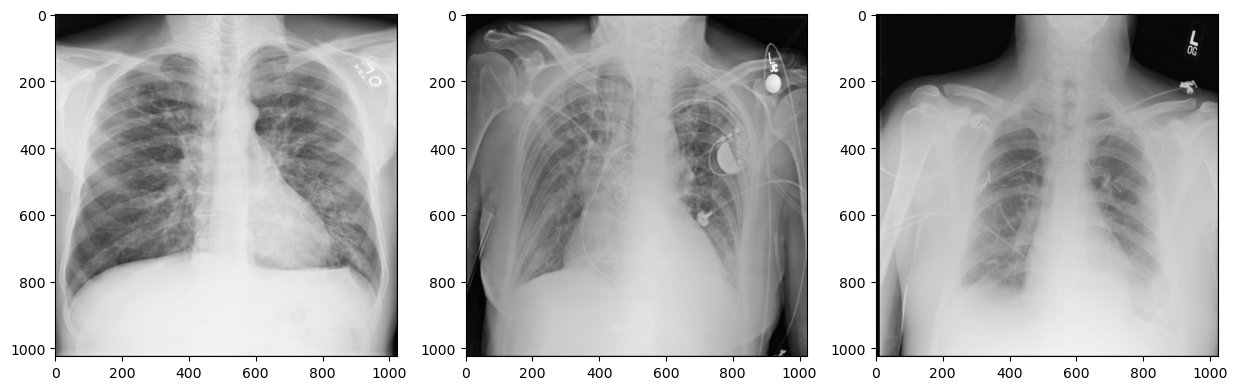

In [6]:
data= nih_val.load_data(0)
image = data['image']
label = data['label']
print(image.shape, label) # 0 : normal, 1: TB, 2: Latent TB
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')

data= nih_val.load_data(20)
image = data['image']
label = data['label']
print(image.shape, label) # 0 : normal, 1: TB, 2: Latent TB
plt.subplot(1,3,2)
plt.imshow(image, cmap='gray')

data= nih_val.load_data(50)
image = data['image']
label = data['label']
print(image.shape, label) # 0 : normal, 1: TB, 2: Latent TB
plt.subplot(1,3,3)
plt.imshow(image, cmap='gray')

In [13]:
import albumentations as A
from univdt.transforms.builder import AVAILABLE_TRANSFORMS
DEFAULT_HEIGHT = 768
DEFAULT_WIDTH = 768
DEFAULT_TRAIN_TRANSFORMS = A.Compose([AVAILABLE_TRANSFORMS['random_resize'](height=DEFAULT_HEIGHT,
                                                                            width=DEFAULT_WIDTH,
                                                                            pad_val=0, p=1.0),
                                      A.HorizontalFlip(p=0.5),
                                      AVAILABLE_TRANSFORMS['random_blur'](magnitude=0.2, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_brightness'](magnitude=0.2, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_contrast'](magnitude=0.2, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_gamma'](magnitude=0.2, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_noise'](magnitude=0.2, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_windowing'](magnitude=0.5, p=0.5),
                                      AVAILABLE_TRANSFORMS['random_zoom'](scale=0.2, pad_val=0, p=0.5),
                                      A.Affine(rotate=(-45, 45), p=0.5),
                                      A.Affine(translate_percent=(0.01, 0.1), p=0.5),
                                      ])

In [14]:
nih_val = NIH(root_dir=root_dir, transform=DEFAULT_TRAIN_TRANSFORMS, split='val')

In [15]:
data = nih_val.load_data(0)

# __getitem__ 메서드를 호출

batch = nih_val[0]

In [16]:
print(batch.keys())
print(batch['image'].shape, batch['label'])

dict_keys(['image', 'label', 'path'])
torch.Size([1, 1024, 1024]) [13]


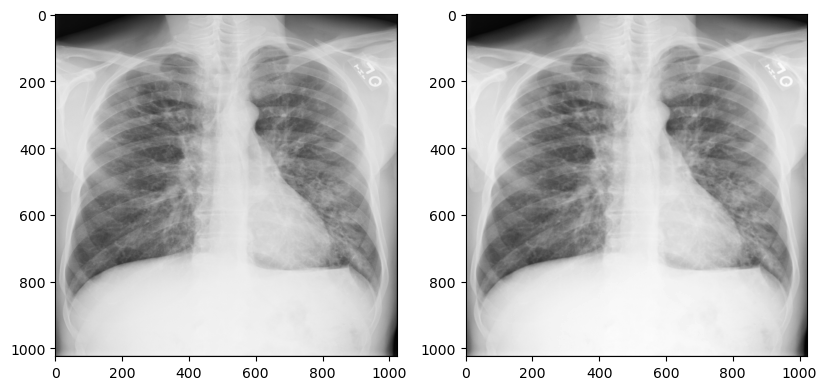

In [18]:
import cv2 
plt.figure(figsize=(15,5))
original_image = cv2.imread(batch['path'])
plt.subplot(1,3,1)
plt.imshow(original_image)

transformed = batch['image']
plt.subplot(1,3,2)
transformed = transformed.numpy().transpose(1,2,0)
plt.imshow(transformed, cmap='gray')
plt.show()

UsageError: %%python is a cell magic, but the cell body is empty.


In [11]:
import sys
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'